*Binxu's Note*: This homework is designed to put what you learn from the Bootstrapping lecture into action. I write some support code to unify the format and for your ease to do experiments. I hope through applying bootstrapping on real dataset, you can feel confident of using it in your research when you are pushed to! 

In [3]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
np.random.choice?

# Q1 Does bootstrapping work?

In this question, you are guided to explore **when bootstrapping method can recover the variability of statistics in the underlying distribution, and when it cannot.**

## a) Non-Gaussianality

You are given a `data`set of $n=20$ samples, as below. They are sampled from an unknown distribution. 

You plot the histogram and O it looks nothing like Gaussian!! 

0.43749451249999993


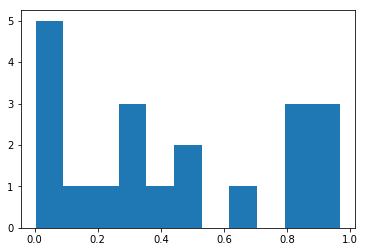

In [121]:
data = np.array([0.44604011, 0.24291367, 0.14908865, 0.04616854, 0.01338132,
                   0.9689176 , 0.00753727, 0.83127147, 0.82584479, 0.35213937,
                   0.39488003, 0.05418458, 0.26723294, 0.52536657, 0.85165188,
                   0.27577266, 0.89017633, 0.68969542, 0.9141726 , 0.00345445])
print(data.mean())
plt.figure()
plt.hist(data, bins=11)
plt.show()

You can estimate a mean value from it, but you want to know the statistical variability (`std`) of this estimate! How can we do that?

* Analytically we know standard error of the mean is computed as $ste=std/\sqrt{n}$
* If you could draw new data from the underlying distribution, you could estimate this by looking at variability across  new datasets. 
* But without getting new data, can we get estimate the varaibility through bootstrapping?

Recall that bootstrapping means resample from current data with replacement. 

### a) i. Estimate the Standard Error of Mean (sem) of this dataset.

In [8]:
data_sem = np.std(data) / np.sqrt(len(data))
print("Analytical estimate of sem (standard error of mean) %.5f" % data_sem)

Analytical estimate of sem (standard error of mean) 0.34785


### a) ii Bootstrap (resample with replacement) a group of $n$ samples 1000  times from the given dataset. 
* Compute mean for each group. 
* Plot the histogram of means.
* Compute `std` of these means and compare to `sem` you got from a). What do you find?

In [4]:
np.random.choice?

In [9]:
group_num = 1000
bstrp_data = np.random.choice(data, size=(group_num, len(data)), replace=True)

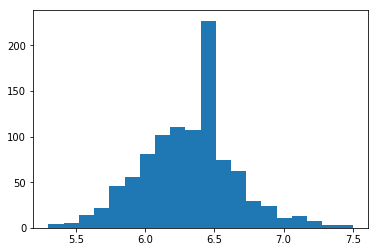

In [12]:
bstrp_means = np.mean(bstrp_data,axis=1)
plt.figure
plt.hist(bstrp_means,bins=20)
plt.show()

In [13]:
print("mean of bootstrap means %.3f, Computed mean %.3f" % (bstrp_means.mean(),np.mean(data)))
print("STD of bootstrap means %.3f, Computed SEM %.3f" % (bstrp_means.std(),data_sem))

mean of bootstrap means 6.309, Computed mean 6.300
STD of bootstrap means 0.344, Computed SEM 0.348


### a) iii Now you are told the dataset you got is actually generated from  a beta distribution `np.random.beta(0.4, 0.6, size=20)`. (You don't have to understand the distribution, aside from it could generate bimodal distribution~) Now you are allowed to draw more samples from it, so do the same thing as ii) draw $n$ samples 1000 times from this underlying binomial distribution. 
* Plot the histogram of mean value, overlay on the histogram of bootstrapped group means in ii).
* Compare the `std` of this distribution to `std` in ii) and `sem` in i). What do you find?

In [17]:
# np.random.binomial(10,p=0.6,size=10)
#newdata_means
group_num = 1000
newdata = np.random.binomial(10,p=0.6,size=(group_num, len(data)))
newdata_means = newdata.mean(axis=1)
print("STD of means (new data from real distribution) %.3f, STD of means (bootstrap data) %.3f, Analytical SEM %.3f" % 
      (newdata_means.std(), bstrp_means.std(),data_sem))

STD of means (new data from real distribution) 0.489, STD of means (bootstrap data) 0.344, Computed SEM 0.348


## b) Extreme Values

Finishing a), you are think that you have a omnipotent tool that could estimate variability for any statistics you want! 

So now you apply bootstrapping method to 90% percentile statistics, (which is an extreme order statistics). Now you get a new dataset `data_b`. Then repeat what you did in a) (actually you could copy most of your code from a)! Just change your distribution.)

* compute the 90% percentile from `data_b`, `np.percentile` is your friend!
* Bootstrap 1000 times from `data_b` and see the distribution of the 90 percentiles in different groups.
* If I told you the `data_b` is drawn from a underlying gaussian distribution by `np.random.normal(loc=10,scale=3,size=10)`, can you draw 1000 new groups from this distribution, and compute 90 percentile of each group and collect the statistics.
* Compare the distribution of 90% from your bootstrapped groups and new data from the underlying distribution. (Plot the 2 histogram, and compare mean and std of 2 distribution.) What do you find?

In [270]:
data_b = np.array([ 7.21681041,  7.01272627, 10.09310074, 15.75868202, 10.00584316,
                    7.20893574, 10.71090242, 10.08991262,  6.46092168,  6.50882273])

In [321]:
np.percentile(data_b,90)

11.215680382253128

In [319]:
# data_b = np.random.normal(loc=10,scale=3,size=10)# np.random.beta(0.5, 0.5, size=20)
group_num = 1000
data_b_sem = np.std(data_b) / np.sqrt(len(data_b))
print("Analytical estimate of sem (standard error of mean) %.5f" % data_b_sem)

bstrp_data_b = np.random.choice(data_b, size=(group_num, len(data_b)), replace=True)
bstrp_data_b_mean = bstrp_data_b.mean(axis=1)
bstrp_data_b_90pct = np.percentile(bstrp_data_b, 90, axis=1)
new_data_b = np.random.normal(loc=10,scale=3,size=(group_num, len(data_b)))
new_data_b_mean = new_data_b.mean(axis=1)
new_data_b_90pct = np.percentile(new_data_b, 90, axis=1)
print("Mean of means (new data from real distribution) %.3f, Mean of means (bootstrap data) %.3f" % 
      (new_data_b_mean.mean(), bstrp_data_b_mean.mean(),))
print("STD of means (new data from real distribution) %.3f, STD of means (bootstrap data) %.3f, Analytical SEM %.3f" % 
      (new_data_b_mean.std(), bstrp_data_b_mean.std(),data_b_sem))
print("Mean of 90 percentile (new data from real distribution) %.3f, Mean of 90 percentile (bootstrap data) %.3f" % 
      (new_data_b_90pct.mean(), bstrp_data_b_90pct.mean(),))
print("STD of 90 percentile (new data from real distribution) %.3f, STD of 90 percentile (bootstrap data) %.3f" % 
      (new_data_b_90pct.std(), bstrp_data_b_90pct.std(),))

Analytical estimate of sem (standard error of mean) 0.86532
Mean of means (new data from real distribution) 9.969, Mean of means (bootstrap data) 9.131
STD of means (new data from real distribution) 0.953, STD of means (bootstrap data) 0.858, Analytical SEM 0.865
Mean of 90 percentile (new data from real distribution) 13.107, Mean of 90 percentile (bootstrap data) 11.993
STD of 90 percentile (new data from real distribution) 1.333, STD of 90 percentile (bootstrap data) 2.297


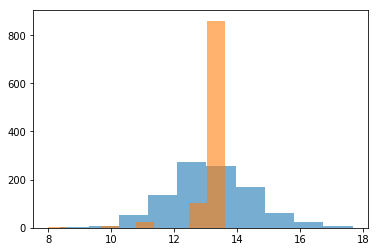

In [316]:
plt.hist(new_data_b_90pct, alpha=0.6)
plt.hist(bstrp_data_b_90pct, alpha=0.6)
plt.show()

# Q2 Patch Shuffling for Image Analysis

The image analysis example in class may still feel mysterious to you, so let's put it into action and let you try do it yourself! 

Recall we have done 2 types of **image shuffling** in class (ignoring the independent sampling one...): 

* generate a red high mask by random sampling the same number of pixel in image (pixel by pixel)
* translate the red image (or green image) to get a new mask 

and then compute the difference within and outside the new mask. 

As Keran and Cindy pointed out in class, it seems translation is keeping too much structure of the image (e.g. the relative distance between the holes / bright spots). So is there any middle ground between pixel shuffling and whole image translation? 

Yes, patch shuffling is one way to go. We can slice the image into patches of equal size and scramble the patches to get a new image. Below, I've implemented a version of `patch_shuffle` function that you can use. So your task here is to replicate what we did in class: 

* Visualize the output from `patch_shuffle`, which patch size should we use to scramble the image? What's your reason?
* Choose at least 2 patch size (i.e. 2 different `div_n`), `roll_image` and then `patch_shuffle`, compute a new `rhigh_mask` and compute the difference of mean pixel value `meandiff` inside and outside the mask in green image `imgg`.  
* Collect the `meandiff` of 1000 shuffles, visualize the distribution, compute `std` of the distribution and the p 0.05 threshold (2-sided) on this distribution. Test the statistics you get from actual experiment against these null. 
    * *Are there any difference in the null distribution got from the 2 patch sizes? Can you explain the difference?*
    
(This example shares structure with the examples I showed in class. So you are encouraged to read the code in the lecture notebook and adapt them here!)

In [474]:
from matplotlib import pyplot as plt
import numpy as np
imgr = plt.imread("red.jpg")
imgg = plt.imread("green.jpg")
H, W = imgg.shape
Thresh = 150
# rhigh_mask = imgr > Thresh

In [472]:
def ind2xy(ind, div_n, pH, pW):
    yi, xi = np.divmod(ind, div_n)
    return yi * pH, xi * pW

def roll_image(img, yroll, xroll):
    imggxshift = np.zeros(img.shape, img.dtype)
    imggyshift = np.zeros(img.shape, img.dtype)
    #assert xroll * yroll is not 0
    if xroll is not 0:
        imggxshift[xroll:,:] = img[:-xroll,:]
        imggxshift[:xroll,:] = img[-xroll:,:] # roll the lower edge up to fill the blank!
    else:
        imggxshift = img.copy()
    if yroll is not 0:
        imggyshift[:,yroll:] = imggxshift[:,:-yroll] # same for x axis.
        imggyshift[:,:yroll] = imggxshift[:,-yroll:]
    else:
        imggyshift = imggxshift
    return imggyshift

def patch_shuffle(img, div_n=8):
    """div_n, how many patch do you want along each axis"""
    # div_n = 16
    H, W = img.shape
    #assert (H%div_n is 0) and (W%div_n is 0), "`div_n` should divide both W and H of image, like 1,2,4,8,16"
    patch_n = div_n * div_n
    pH = int(H / div_n)
    pW = int(W / div_n)
    perm_p_id = np.random.permutation(patch_n)
    imgpshf = np.zeros(img.shape, img.dtype)
    imgpshf[:,:] = img[:,:]
    for ind in range(patch_n):
        targ_y, targ_x = ind2xy(ind, div_n, pH, pW)
        src_y, src_x = ind2xy(perm_p_id[ind], div_n, pH, pW)
        imgpshf[targ_y:targ_y + pH, targ_x:targ_x + pW] = img[src_y:src_y + pH, src_x:src_x + pW]
    
    return imgpshf

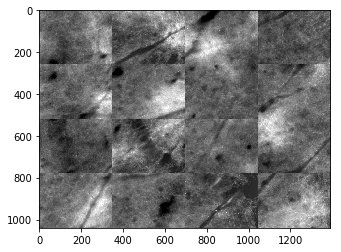

In [478]:
plt.imshow(patch_shuffle(imgr, 4), cmap='gray')

In [479]:
print("0.05 p threshold for difference of mean intensity [%.3f,%.3f]"%(, ))

SyntaxError: invalid syntax (<ipython-input-479-fe91c06a112a>, line 1)

# Q3 Does my Place Cell Really Have "Placeness"?

Finally, let's apply bootstrap test on some real spikes from a recently published paper! (Cite [Spatial encoding in primate hippocampus during free navigation](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3000546) )

[Their Open Dataset on Datadryad](https://datadryad.org/stash/dataset/doi:10.5061/dryad.kk63d49)

In the paper they record from a marmoset with an electrod array in hippocampus. The animal is free to move on a L shaped arena and the spikes and the position of the animal are recorded in the dataset. Here we want to test that the neuron really has "placeness". Before move on, think about what is placeness in your mind, if you are going to design an index for it and test it.  

![](https://journals.plos.org/plosbiology/article/figure/image?size=large&id=info:doi/10.1371/journal.pbio.3000546.g001)

## a) Explore the Data 

*Binxu's Note*: Here I present my code to explore the dataset (which may be challenging for those who've never analyzed spikes with python). If you are confident, you are encouraged to write your own and explore the dataset! But if you are not, run through my code and try to understand what each part is doing will also get you full score!

First put the 2 files `SpkTime_data.p` `Pos_data.p` in the same folder as your notebook. And use package `pickle` to load them up! 

In [322]:
import pickle
spikeTime = pickle.load(open("SpkTime_data.p", "rb"))
position = pickle.load(open("Pos_data.p", "rb"))

The dataset consists of a `dictionary` of spike times (extracellular Ephys recording) in different channel and unit. You can use `spikeTime[(2, 0)]` to load up the spike times of unit 0 in channel 2 in the recording.  

In [323]:
list(spikeTime.keys())

[(2, 0), (2, 1), (4, 0), (4, 1), (22, 0), (55, 0), (55, 1)]

The other part is the behavior data of the marmoset, it's a dictionary with 3 keys, `XPos` `YPos` and `T` specifying the X, Y coordinate of the animal and time. 

In [324]:
list(position.keys())

['XPos', 'YPos', 'T']

In [540]:
XPos = position['XPos'][0,:-1] # X position 
YPos = position['YPos'][0,:-1] # Y position
tbins = position['T'][0,:-1] # T for each X, Y coordinates
Tmin = np.nanmin(tbins)
Tmax = np.nanmax(tbins)
tstep = 1 / 29.97  # the frame rate is 29.97Hz, inter frame interval is its inverse

I'm going to find the frame and spatial position where the neuron fires a spike. I have this function below `find_spike_pos`

In [612]:
def find_spike_pos(X,Y,tbins,spkT):
    """Find the frame that the spike happens and extract the x,y coordinate of marmoset"""
    tstep = 1 / 29.97
    spk_ti = np.maximum(0, np.floor((spkT - tbins[0])/tstep).astype(np.int))
    return X[spk_ti], Y[spk_ti]

And visualize the spike over trajectory

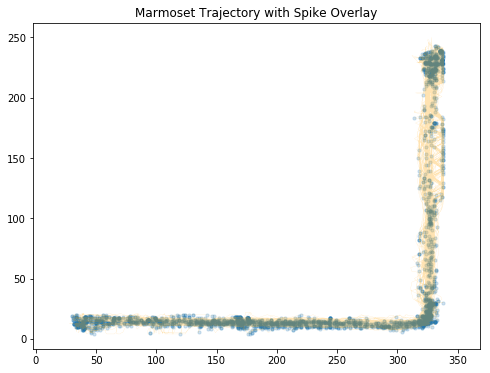

In [613]:
spkT = spikeTime[(2, 0)][0,:]
spkX, spkY = find_spike_pos(XPos,YPos,tbins,spkT)
plt.figure(figsize=[8,6])
plt.scatter(spkX, spkY, s=10, alpha=0.2)
plt.plot(XPos, YPos, c='orange', alpha=0.3, linewidth=0.2)
plt.axis("equal")
plt.title("Marmoset Trajectory with Spike Overlay")
plt.show()

As is done in the paper, we want to bin the L shape space into 5cm bins along the length, and we will have around 106 bins. 

The description of their arena in the paper
> This track was 244 cm long and 15 cm wide, creating a single principal direction of motion of travel for the marmosets introduced to the environment. The track was wide enough for marmosets to turn around comfortably but did not allow for significant movement in the off-axis direction. The interior walls and floor of the track were painted matte black with horizontal gray and white stripes on opposite ends of the track to allow the marmosets to orient themselves within the track, because the high walls (122 cm) prevented the marmosets from seeing the rest of the room. In addition to this linear track, an L track was constructed featuring 2 linear arms oriented perpendicularly and connected at a corner such that a marmoset traveling from one end of this track to the other needed to negotiate a 90° turn. The arms of the track were not symmetric in length; the long arm was 243 cm, and the short arm was 183 cm for a cumulative travel distance of 426 cm from end to end. 

In [614]:
def descretize_coordinates(X, Y):
    """Take in the X coordinat and Y coordinate, and output the index of bin the animal is in"""
    bin_idx = np.zeros(X.shape, np.int)
    bin_idx[X < 313] = np.floor((X[X < 313] - 28) / 5).astype(np.int) # [0 - 57)
    bin_idx[X >= 313] = np.floor((Y[X >= 313] - 5) / 5 + 57).astype(np.int) # [57, 105)
    return bin_idx

In [604]:
spkT = spikeTime[(2, 0)][0,:] # use this to make it a 1d array, not 2d
spkX, spkY = find_spike_pos(XPos, YPos, tbins, spkT)

In [605]:
bin_idx_all = descretize_coordinates(XPos, YPos)
bin_idx_spk = descretize_coordinates(spkX, spkY)

We can count the times that a spike happens in a spatial bin, and the times that the animal visit a spatial bin, using a hisogram to visualize!

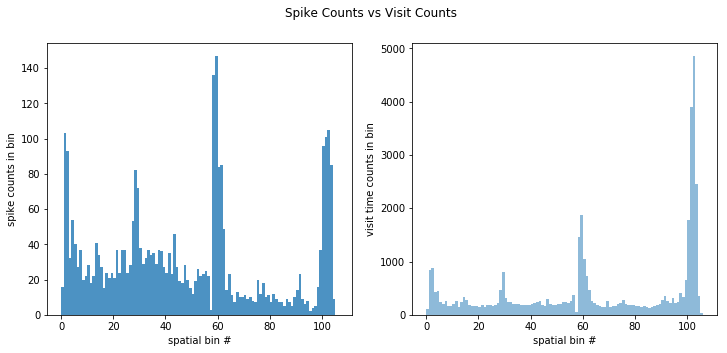

In [609]:
plt.figure(figsize=[12,5])
plt.subplot(121)
plt.hist(bin_idx_spk, alpha=0.8, bins=106, range=[0,106])
plt.ylabel("spike counts in bin")
plt.xlabel("spatial bin #")
plt.subplot(122)
plt.hist(bin_idx_all, alpha=0.5, bins=106, range=[0,106])
plt.ylabel("visit time counts in bin")
plt.xlabel("spatial bin #")
plt.suptitle("Spike Counts vs Visit Counts")
plt.show()

Seems the neuron fires more ofen at 20-40 bins! More often than the animal stays there, so we can compute the firing rate.

In [615]:
spk_cnts_by_bin, _ = np.histogram(bin_idx_spk, bins=106, range=[0,106])
stay_cnt_by_bin, _ = np.histogram(bin_idx_all, bins=106, range=[0,106])

Text(0.5, 0, 'spatial bin #')

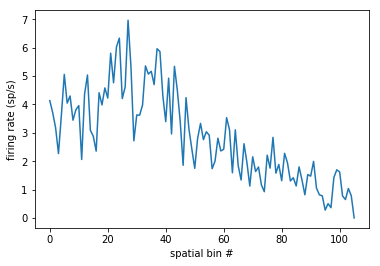

In [616]:
plt.plot(spk_cnts.astype(float)/stay_cnts/tstep)
plt.ylabel("firing rate (sp/s)")
plt.xlabel("spatial bin #")

But how are we going to test the placeness of this firing rate plot? Some computational neuroscientists define an index to address this. 

Literally, placeness means the firing of Place cell $r(x)$ conveys information about the location $x$ of the subject. And this notion could be made precise using tools from information theory. Neural system could be thought of as a noisy information channel, and one measure of the channel capacity is the [Skaggs–McNaughton information index](http://papers.nips.cc/paper/671-an-information-theoretic-approach-to-deciphering-the-hippocampal-code.pdf) which has the unit `bits/spike` so 

$$I = \sum_x r(x)\log_2{r(x)\over \bar r}p(x)$$

>where $r(x)$ is the firing rate of the cell as a function of position along the track, $\bar r$ is the mean firing rate of the cell throughout the recording, and $p(x)$ is the probability of the marmoset occupying bin $x$ along the track, which is computed from the behavioral data.

Let's compute this with our spikes

In [580]:
def SkaggsMcNaugh_InfoIndex(spk_cnts_by_bin, stay_cnt_by_bin):
    tstep = 1 / 29.97
    total_time = stay_cnt_by_bin.sum() * tstep
    mean_rate = spk_cnts_by_bin.sum() / total_time
    rate_by_bin = spk_cnts_by_bin / (stay_cnt_by_bin * tstep)
    p_stay_by_bin = stay_cnt_by_bin / stay_cnt_by_bin.sum()
    SM_info = np.nansum(rate_by_bin * np.log2(rate_by_bin / mean_rate) * p_stay_by_bin)
    return SM_info

In [581]:
SkaggsMcNaugh_InfoIndex(spk_cnts_by_bin, stay_cnt_by_bin)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


0.686064595974475

## b) Shuffle Test on Info Index. 
Now you have my code to compute Information Index from spike time, it's your turn to shuffle the spike time and test if the experiment result if significant!

As always, there are multiple ways to shuffle your data, here you are asked to use 3 different ways to perturb the data. A few options that I've mentioned in class

* Generate uniformly distributed spike time, keep the spike number the same as your real data. (Cf. pixel shuffle in image.)
* Cut your spike train into pieces, and shuffle these pieces. (Cf. patch shuffle in image)
* Add jitter $\Delta t$ (which is from a normal distribution of std $\sigma$) to each of your spike independently. (move each of your spike in time by $\Delta t$). 

BUT, you are highly ENCOURAGED to explore your own ways to shuffle spikes! 

*PS: Can you feel the similarity between this example and the 2 image alignment example in Q2 and lass? Many thoughts and issues are shared for spatial and sequential signal!*


**Requirement**: 
* For each type of shuffling you choose, 
    * Try to articulate what **kind of hypothesis** you are testing by doing this perturbation. (It's alright that you fail.) Think about what kind of statistical structure you are keeping and what you destroy.
    * Plot the scatter plot of spike on trajectory, how does it look like? Does it look like a place cell to your eye?
    * Shuffle spikes 1000 times (or a number you like) using your method, collect the Skaggs-McNaughton information indices. 
    * Plot the distribution of info-index, and show where your the index from experiment resides in this distribution. 
* Compare the distributions from different shuffling methods. Why do you think they are different. 
* And what kind of questions about place cell could you answer using these shuffle tests? 

In [601]:
spkT = spikeTime[(2, 1)][0,:]
shfl_spkT = (Tmax - Tmin) * np.random.rand(len(spkT))
spkX, spkY = find_spike_pos(XPos, YPos, tbins, shfl_spkT) # spkT)
bin_idx_all = descretize_coordinates(XPos, YPos)
bin_idx_spk = descretize_coordinates(spkX, spkY)
spk_cnts_by_bin, _ = np.histogram(bin_idx_spk, bins=106, range=[0,106])
stay_cnt_by_bin, _ = np.histogram(bin_idx_all, bins=106, range=[0,106])
SkaggsMcNaugh_InfoIndex(spk_cnts_by_bin, stay_cnt_by_bin)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


0.05752502994568125

Here is a function the compute info index from spike time, see, I just wrap the code above inside a function in order to keep the experiment code clean.

In [165]:
def computeInfoIndex(spkT):
    spkX, spkY = find_spike_pos(XPos, YPos, tbins, spkT) 
    bin_idx_all = descretize_coordinates(XPos, YPos)
    bin_idx_spk = descretize_coordinates(spkX, spkY)
    spk_cnts_by_bin, _ = np.histogram(bin_idx_spk, bins=106, range=[0,106])
    stay_cnt_by_bin, _ = np.histogram(bin_idx_all, bins=106, range=[0,106])
    return SkaggsMcNaugh_InfoIndex(spk_cnts_by_bin, stay_cnt_by_bin)

### Uniformly Scatter Spikes

In [169]:
spkT = spikeTime[(2, 1)][0,:]
shfl_spkT = (Tmax - Tmin) * np.random.rand(len(spkT))
computeInfoIndex(shfl_spkT)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


0.062360373552608324

### Jitter Spikes

In [203]:
sigma = 0.5
spkT = spikeTime[(2, 0)][0,:]
jitter_spkT = spkT + sigma * np.random.randn(spkT.shape[0])
computeInfoIndex(jitter_spkT)

0.6488502108117836

### Time Clip Shuffling

In [129]:
spkT = spikeTime[(2, 0)][0,:]

This part shows how I build the shuffle function up step by step

In [130]:
shuf_spkT = np.zeros(spkT.shape, spkT.dtype)
clip_n = 3
timesep = np.linspace(Tmin, Tmax+0.1, num=clip_n+1, endpoint=True)
spkidx_in_sep = []
for i in range(clip_n): # find which spike reside in this time clip
    spk_idx = ((spkT >= timesep[i]) & (spkT < timesep[i+1])).nonzero()[0]
    spkidx_in_sep.append(spk_idx) 

In [131]:
sep_perm = np.random.permutation(clip_n) # permute the clip indices
for i in range(clip_n): # permute the start time of the clip
    idx = spkidx_in_sep[i]
    shuf_spkT[idx] = spkT[idx] - timesep[i] + timesep[sep_perm[i]] # permute spike times 

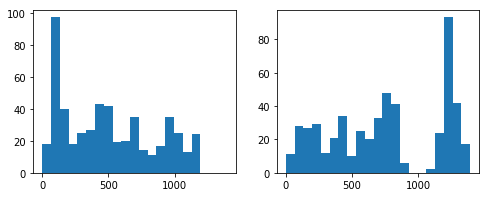

In [138]:
spkT = spikeTime[(2, 1)][0,:]
plt.figure(figsize=[8,3])
plt.subplot(121)
plt.hist(spkT, range=[Tmin, Tmax],bins=21)
plt.subplot(122)
plt.hist(clip_shuffle(spkT, clip_n=5), range=[Tmin, Tmax],bins=21)
plt.show()

In [95]:
def clip_shuffle(spkT, clip_n=3):
    shuf_spkT = np.zeros(spkT.shape, spkT.dtype)
    timesep = np.linspace(Tmin, Tmax, num=clip_n+1, endpoint=True)
    spkidx_in_sep = []
    for i in range(clip_n): # find which spike reside in this time clip
        spk_idx = ((spkT >= timesep[i]) & (spkT < timesep[i+1])).nonzero()[0]
        spkidx_in_sep.append(spk_idx)
    sep_perm = np.random.permutation(clip_n) # permute the clip indices
    for i in range(clip_n): # permute the start time of the clip
        idx = spkidx_in_sep[i]
        shuf_spkT[idx] = spkT[idx] - timesep[i] + timesep[sep_perm[i]] # permute spike times 
    return shuf_spkT

In [201]:
clip_n = 5
spkT = spikeTime[(2, 0)][0,:]
clip_shf_spkT = clip_shuffle(spkT, clip_n=clip_n)
computeInfoIndex(clip_shf_spkT)

0.37720728786339813

## c) (optional) The authors claim that the neurons have spatial selectivity during high velocity (HV) movement. Explore ways to test their claim! 

**Hint**: the authors separate out the HV part of timeline and test only on this part. 

> These experiments confirmed the presence of neurons that exhibit spatial selectivity during high-velocity (HV) locomotion in a simple linear environment. 
> (HV locomotion was defined as movement >20 cm/s, and LV locomotion was defined as all movement below this threshold.)

In [490]:
def speed(X, Y, T, dt=4):
    v = np.zeros_like(T)
    v.fill(np.nan)
    v[:-dt] = np.sqrt((X[dt:] - X[:-dt])**2 + (Y[dt:] - Y[:-dt])**2) / (T[dt:] - T[:-dt])
    return v

def velocity(X, Y, T, dt=4):
    vX = np.zeros_like(T)
    vX.fill(np.nan)
    vX[:-dt] = (X[dt:] - X[:-dt]) / (T[dt:] - T[:-dt])
    vY = np.zeros_like(T)
    vY.fill(np.nan)
    vY[:-dt] = (Y[dt:] - Y[:-dt]) / (T[dt:] - T[:-dt])
    return vX, vY